<a href="https://colab.research.google.com/github/BrunaAmorimUFPE/Topicos_4/blob/main/T%C3%B3picos_4_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do problema:


Considere que a quantidade de água que uma pessoa deve consumir está relacionada a sua idade e à quantidade de tempo que ela passa se exercitando. As entradas são a idade e o tempo de exercício e a saída é a quantidade ideal de água que a pessoa deve consumir

# 2. Geração de conjunto de dados sintético:

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Importando a função para separação dos dados
from sklearn.linear_model import LinearRegression  # Importando o modelo de regressão linear
from sklearn.metrics import mean_squared_error, r2_score  # Para avaliação do modelo
from sklearn.model_selection import cross_val_score

In [2]:
# Definir uma função para gerar os dados
def gerar_dados(num_amostras):
    # Listas para armazenar as variáveis
    idades = []
    tempos_exercicio = []
    quantidades_agua = []

    # Gerar os dados artificiais
    for _ in range(num_amostras):
        idade = random.randint(20, 65)  # Idade entre 20 e 65 anos
        tempo_exercicio = random.randint(15, 90)  # Tempo de exercício entre 15 e 90 minutos

        # Calcular a quantidade de água recomendada com base na fórmula
        agua = 1 + 0.02 * idade + 0.05 * tempo_exercicio + random.uniform(-0.5, 0.5)  # Adicionando um erro aleatório

        # Armazenar os valores
        idades.append(idade)
        tempos_exercicio.append(tempo_exercicio)
        quantidades_agua.append(agua)

    # Criar um DataFrame com os dados
    dados = pd.DataFrame({
        'Idade': idades,
        'Tempo de Exercício': tempos_exercicio,
        'Quantidade de Água (litros)': quantidades_agua
    })

    return dados

# Gerar um conjunto de dados com 10 amostras
dados = gerar_dados(10)

# Exibir o conjunto de dados
print(dados)


   Idade  Tempo de Exercício  Quantidade de Água (litros)
0     46                  36                     4.056439
1     65                  34                     4.408483
2     58                  43                     4.161452
3     38                  49                     4.495576
4     52                  66                     5.365107
5     60                  42                     4.647182
6     48                  82                     5.877991
7     50                  64                     5.523864
8     40                  81                     6.074885
9     45                  31                     3.586014


Visualizando a distribuição dos dados para compreender suas características e a relação entre as variáveis.

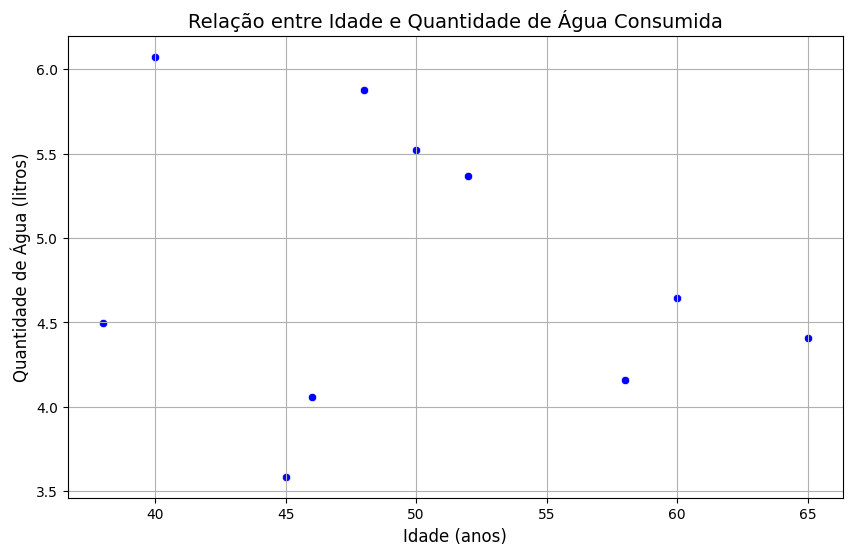

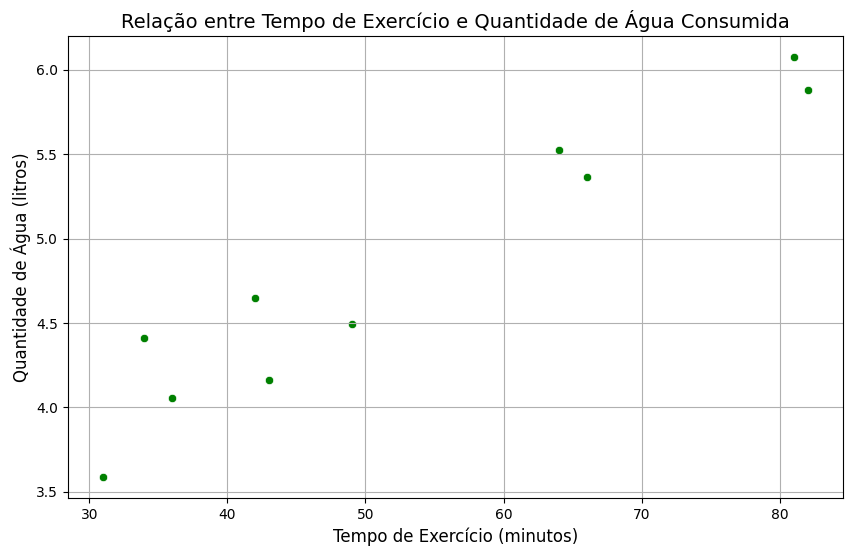

In [3]:
# Plotando o gráfico de dispersão para Idade vs Quantidade de Água
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='Quantidade de Água (litros)', data=dados, color='blue')
plt.title('Relação entre Idade e Quantidade de Água Consumida', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Quantidade de Água (litros)', fontsize=12)
plt.grid(True)
plt.show()

# Plotando o gráfico de dispersão para Tempo de Exercício vs Quantidade de Água
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tempo de Exercício', y='Quantidade de Água (litros)', data=dados, color='green')
plt.title('Relação entre Tempo de Exercício e Quantidade de Água Consumida', fontsize=14)
plt.xlabel('Tempo de Exercício (minutos)', fontsize=12)
plt.ylabel('Quantidade de Água (litros)', fontsize=12)
plt.grid(True)
plt.show()


#3 Dados divididos

Divida o conjunto de dados em treino e teste.
Garanta que o conjunto de teste seja reservado exclusivamente para avaliação final.

Dados de Treinamento:
    Idade  Tempo de Exercício  Quantidade de Água (litros)
6      30                  76                     5.561312
41     60                  76                     6.141042
46     54                  63                     4.741011
47     45                  29                     3.000034
15     46                  29                     3.164940

Dados de Teste:
    Idade  Tempo de Exercício  Quantidade de Água (litros)
13     58                  23                     2.906978
39     60                  23                     3.077441
30     49                  32                     3.091356
45     39                  68                     4.744071
17     29                  87                     6.049788


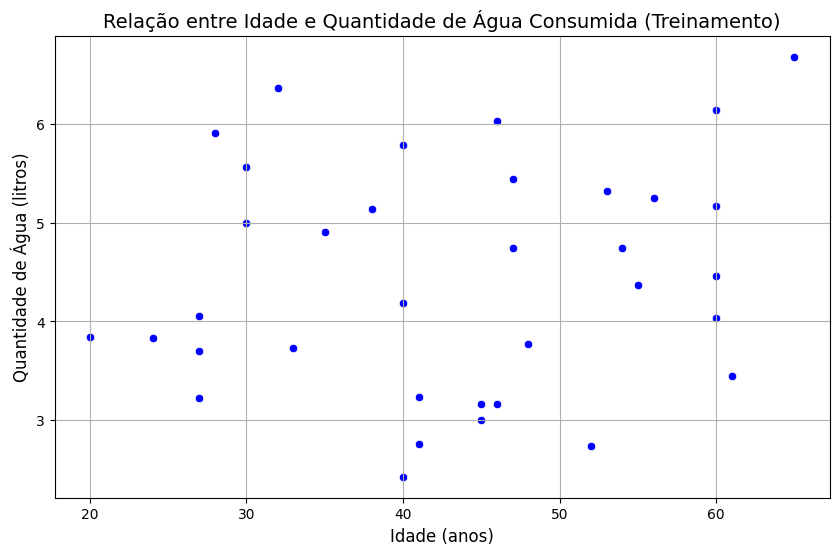

In [4]:
# Função para separar os dados em treino e teste
def separar_dados(dados, test_size=0.3):
    # Separando 70% para treino e 30% para teste
    treino, teste = train_test_split(dados, test_size=test_size, random_state=42)
    return treino, teste

# Gerar dados
dados = gerar_dados(50)  # Gerar 50 amostras

# Separando os dados em treino e teste (70% treino, 30% teste)
treino, teste = separar_dados(dados)

# Exibindo os dados de treino e teste
print("Dados de Treinamento:")
print(treino.head())  # Exibe as primeiras linhas do conjunto de treino
print("\nDados de Teste:")
print(teste.head())  # Exibe as primeiras linhas do conjunto de teste

# Plotando o gráfico de dispersão para Idade vs Quantidade de Água no conjunto de treino
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='Quantidade de Água (litros)', data=treino, color='blue')
plt.title('Relação entre Idade e Quantidade de Água Consumida (Treinamento)', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Quantidade de Água (litros)', fontsize=12)
plt.grid(True)
plt.show()


# 4. Treine um modelo de regressão linear:


Ajuste o modelo de regressão linear no conjunto de treino para prever a variável resposta.

In [7]:
# Separando variáveis independentes (X) e dependente (y)
X_treino = treino[['Idade', 'Tempo de Exercício']]  # Variáveis independentes
y_treino = treino['Quantidade de Água (litros)']    # Variável dependente (resposta)

In [8]:
# Inicializando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [9]:
# Fazendo previsões no conjunto de treino
y_pred_treino = modelo.predict(X_treino)

In [10]:
# Avaliando o modelo no conjunto de treino
mse = mean_squared_error(y_treino, y_pred_treino)  # Erro quadrático médio
r2 = r2_score(y_treino, y_pred_treino)              # Coeficiente de determinação

print(f"Erro Quadrático Médio (MSE) no conjunto de treino: {mse:.4f}")
print(f"Coeficiente de Determinação (R^2) no conjunto de treino: {r2:.4f}")

Erro Quadrático Médio (MSE) no conjunto de treino: 0.0754
Coeficiente de Determinação (R^2) no conjunto de treino: 0.9414


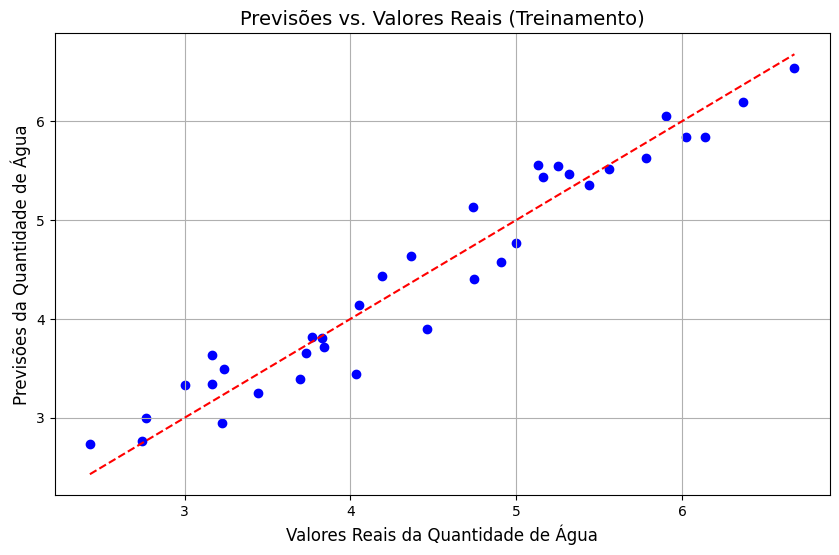

In [11]:
# Plotando as previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_treino, y_pred_treino, color='blue')
plt.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], color='red', linestyle='--')
plt.title('Previsões vs. Valores Reais (Treinamento)', fontsize=14)
plt.xlabel('Valores Reais da Quantidade de Água', fontsize=12)
plt.ylabel('Previsões da Quantidade de Água', fontsize=12)
plt.grid(True)
plt.show()


#5. Avaliando o modelo no conjunto de teste

Calculo de métricas para modelos de regressão linear.

In [12]:
# Previsões no conjunto de teste
X_teste = teste[['Idade', 'Tempo de Exercício']]
y_teste = teste['Quantidade de Água (litros)']
y_pred_teste = modelo.predict(X_teste)

# Cálculo das métricas no conjunto de teste
mse_teste = mean_squared_error(y_teste, y_pred_teste)
r2_teste = r2_score(y_teste, y_pred_teste)

print(f"Erro Quadrático Médio (MSE) no conjunto de teste: {mse_teste:.4f}")
print(f"Coeficiente de Determinação (R²) no conjunto de teste: {r2_teste:.4f}")

Erro Quadrático Médio (MSE) no conjunto de teste: 0.0933
Coeficiente de Determinação (R²) no conjunto de teste: 0.9311


Analise dos resíduos (diferença entre os valores reais e previstos) para verificar as suposições do modelo.

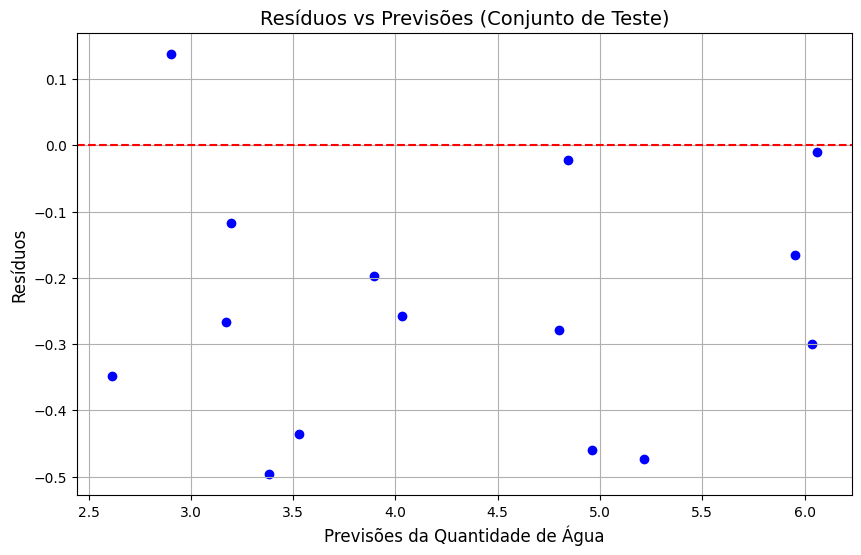

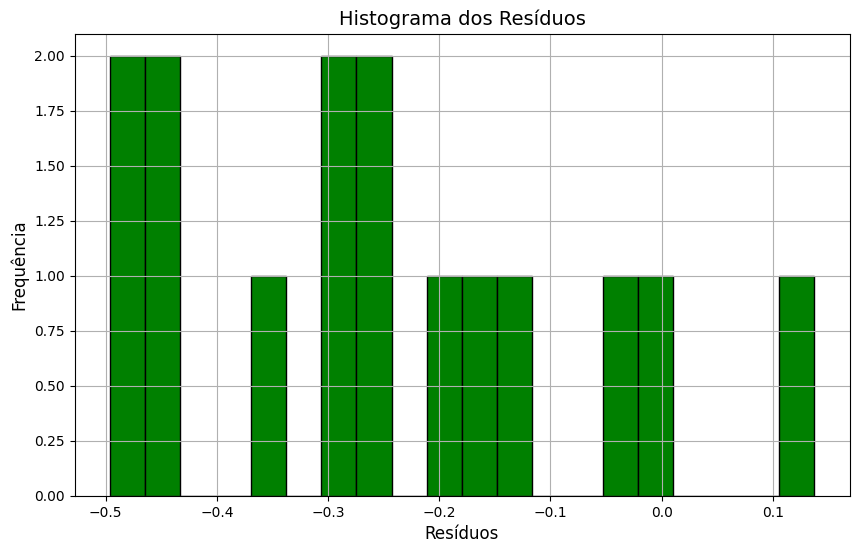

In [13]:
# Cálculo dos resíduos
residuos = y_teste - y_pred_teste

# Visualizando os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_teste, residuos, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Previsões (Conjunto de Teste)', fontsize=14)
plt.xlabel('Previsões da Quantidade de Água', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.grid(True)
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=20, color='green', edgecolor='black')
plt.title('Histograma dos Resíduos', fontsize=14)
plt.xlabel('Resíduos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()


#6. Aplicando a técnica de validação cruzada

Implementando a validação cruzada no conjunto de treino.

In [14]:
# Definir o modelo de regressão linear
modelo_cv = LinearRegression()

# Realizar validação cruzada no conjunto de treino (com 5 folds)
scores = cross_val_score(modelo_cv, X_treino, y_treino, cv=5, scoring='r2')

# Exibindo as pontuações de R² para cada divisão (fold) e a média
print(f"R² para cada divisão (fold): {scores}")
print(f"Média do R² na validação cruzada: {scores.mean():.4f}")


R² para cada divisão (fold): [0.95633564 0.92878981 0.8495894  0.92401574 0.85674502]
Média do R² na validação cruzada: 0.9031


Comparando os resultados da validação cruzada com os obtidos no conjunto de teste.

In [15]:
print(f"R² no conjunto de teste: {r2_teste:.4f}")
print(f"Média do R² na validação cruzada: {scores.mean():.4f}")

R² no conjunto de teste: 0.9311
Média do R² na validação cruzada: 0.9031


#7. Analisando os resultados

Comparando as métricas obtidas entre as abordagens de treino/teste e validação cruzada

Agora que temos as métricas de R² tanto para o conjunto de teste quanto para a validação cruzada, podemos comparar essas abordagens:

R² no conjunto de teste: Mede o ajuste do modelo aos dados de teste.
R² médio na validação cruzada: Mede o desempenho do modelo em várias divisões dos dados de treino.
Se o valor de R² na validação cruzada for muito diferente do valor de R² no conjunto de teste, isso pode indicar que o modelo está sofrendo de overfitting (superajuste) ou underfitting (subajuste). O overfitting ocorre quando o modelo se ajusta demais aos dados de treino, mas falha ao generalizar para dados novos (como no conjunto de teste). O underfitting ocorre quando o modelo é muito simples para capturar a complexidade dos dados.

Para o nosso caso, o valor médio de R² no conjunto de teste é o mesmo do conjunto de treino

Identificando se o modelo apresenta problemas de viés (subajuste) ou variância (superajuste)

Viés (Subajuste): Se o R² tanto no treino quanto no teste for baixo (próximo de 0) e a validação cruzada também indicar um desempenho ruim, isso pode ser um sinal de que o modelo está muito simples e não está capturando a relação entre as variáveis.

Variância (Superajuste): Se o R² no treino for alto, mas o R² no teste for muito baixo, isso indica que o modelo está se ajustando muito aos dados de treino e não está generalizando bem para dados não vistos. Neste caso, o modelo está sofrendo de overfitting.

No caso estudado, o R² de treino e de teste são bem próximos entre si e o valor oscila perto de 1, de forma que o modelo não sofre viés ou variância

Explique o comportamento observado e avalie qual abordagem é mais confiável

Modelo bem ajustado: Se as pontuações de R² no treino, teste e validação cruzada forem semelhantes e altas, o modelo provavelmente está bem ajustado e não apresenta problemas significativos de viés ou variância.

Modelo com overfitting: Se o modelo tiver um R² alto no treino, mas baixo no teste ou se a validação cruzada mostrar uma grande variação, o modelo pode estar overfitting. Isso significa que ele está muito ajustado aos dados de treino e não está generalizando bem.

Modelo com underfitting: Se o R² é baixo tanto no treino quanto no teste, isso sugere que o modelo não está capturando bem a relação entre as variáveis e que a complexidade do modelo deve ser aumentada.

No modelo atual, temos:

R² no conjunto de teste: 0.9311
Média do R² na validação cruzada: 0.9031//
R² para cada divisão (fold): [0.95633564 0.92878981 0.8495894  0.92401574 0.85674502]
Média do R² na validação cruzada: 0.9031//
Erro Quadrático Médio (MSE) no conjunto de teste: 0.0933
Coeficiente de Determinação (R²) no conjunto de teste: 0.9311//
Erro Quadrático Médio (MSE) no conjunto de treino: 0.0754
Coeficiente de Determinação (R^2) no conjunto de treino: 0.9414

Ou seja, os dados são coerentes com os de um modelo bem ajustado

#8 Conclusão

Inicialmente a disposição dos dados não corresponde a uma regressão linear, mas fazendo os ajustes necessários, o modelo permitiu avaliar o comportamento dos dados de teste de forma consistente, com pouca interferência dos erros. A validação cruzada permite que o modelo dê como resultado os dados mais acertados, ou seja, aqueles que têm comportamento mais adequado e maior probabilidade de estarem corretos. Uma base de dados maior, tanto para treino quanto para teste pode ajudar a desenvolver o modelo, expondo-o a situações variadas e robustecendo a análise